In [23]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)

In [28]:
#df = open(r'C:\Users\auroa\movies.csv', 'r')

#df = ''.join([i for i in df])

#df = text.replace(',', ';') 

#updated_df = open(r'C:\Users\auroa\updated_movies.csv','w')

#updated_df.writelines(df)
#updated_df.close()

Define dataframe:

In [3]:
df_movies = pd.read_csv(r'C:\Users\auroa\movies.csv', sep=',', index_col=False).dropna(axis=0, how='any')

In [57]:
df_movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Confirm that there is no missing data:

In [58]:
for col in df_movies.columns:
    pct_missing = np.mean(df_movies[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [39]:
df_movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Eliminate '.0' from the values, by changing the datatype 'float64' to 'int64':

In [4]:
columns_to_change = ['votes', 'budget', 'gross', 'runtime']

for i in columns_to_change:
    df_movies[i] = df_movies[i].astype('int64')

#df_movies[columns_to_change] = df_movies[columns_to_change].astype('int64')

Eliminate 'year' column (same info) and get year from 'released' column because it is more reliable:

In [5]:
df_movies = df_movies.drop(['year'], axis=1)

In [6]:
correct_year = df_movies['released'].str.split(',', expand = True)[1].str[:5]
df_movies['correct year'] = correct_year

Drop duplicates, if any:

In [7]:
df_movies['name'] = df_movies['name'].drop_duplicates()

df_movies.shape

(5421, 15)

Assess the correlation between budget and gross revenue through simple scatter:

Text(0, 0.5, 'Budget [million]')

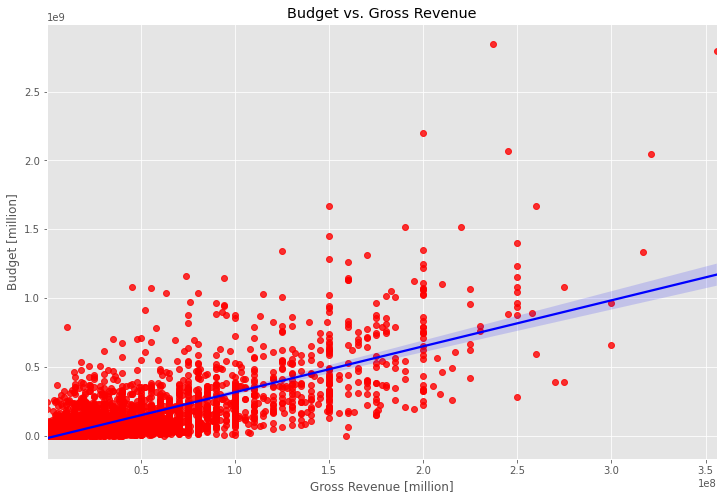

In [47]:
sns.regplot(x='budget', y='gross', data=df_movies, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title('Budget vs. Gross Revenue')
plt.xlabel('Gross Revenue [million]')
plt.ylabel('Budget [million]')

Assess correlation between budget and gross revenue through 'corr' method:

In [48]:
df_movies.corr(method='pearson') #only between numerical data

#Types of correlation: Pearson(default), Kendall, Spearman

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


Build a correlation matrix (numeric features):

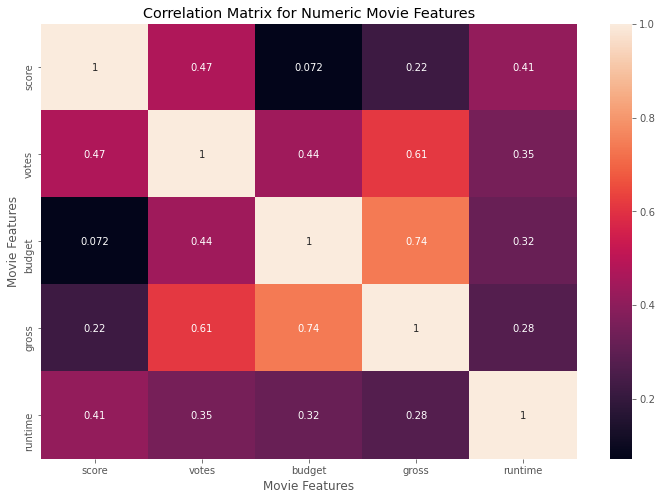

In [49]:
correlation_matrix = df_movies.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Assess correlation between company and gross revenue:

In [50]:
#String data needs to be numerized in order to assess numerical correlation

df_movies_num = df_movies

for col in df_movies_num.columns:
    if df_movies_num[col].dtype == 'object':
        df_movies_num[col] = df_movies_num[col].astype('category')
        df_movies_num[col] = df_movies_num[col].cat.codes  #it will numerize the string data

df_movies_num.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
0,4692,6,6,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,0
1,3929,6,1,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,0
2,3641,4,0,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,0
3,204,4,4,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,0
4,732,6,4,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,0


Build a correlation matrix (with numerized qualitative features):

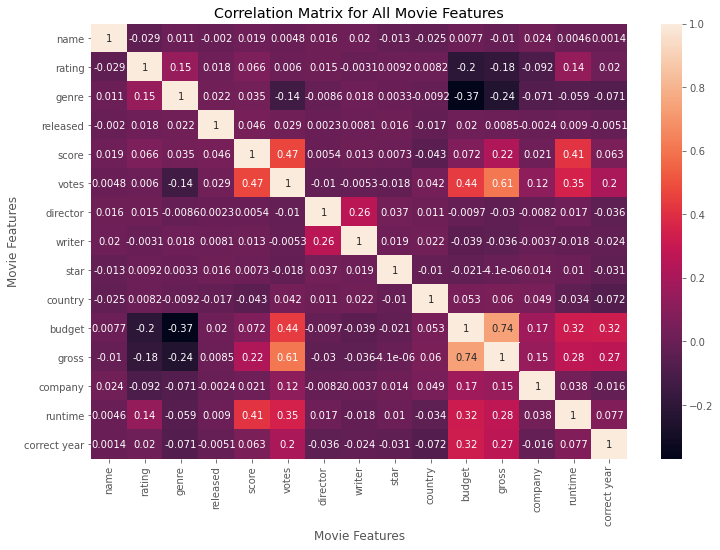

In [51]:
correlation_matrix1 = df_movies_num.corr(method='pearson')

sns.heatmap(correlation_matrix1, annot=True)
plt.title('Correlation Matrix for All Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Show the high correlations (>0.5):

In [52]:
correlation_matrix1 = df_movies_num.corr(method='pearson')

corr_pairs = correlation_matrix1.unstack()
sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross         votes           0.614751
votes         gross           0.614751
budget        gross           0.740247
gross         budget          0.740247
name          name            1.000000
writer        writer          1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct year  correct year    1.000000
dtype: float64

Conclusions:
'Budget' and 'Votes' present the highest correlation to 'Gross Revenue'. 
'Company' presents a low correlation to 'Gross Revenue'.

Movie Reccomendations based on established criteria (in this case, it was intended to search for the best scored drama movies, and sort the results into short and long movies):

In [63]:
#No otimized code

def get_drama(df):
    short_names = []
    short_scores = []
    long_names = []
    long_scores = []
    for i in df.index:
        if df['genre'][i] == 'Drama' and df['score'][i] > 8.0 and df['runtime'][i] <= 120:
            short_names.append(df['name'][i])
            short_scores.append(df['score'][i])
        elif df['genre'][i] == 'Drama' and df['score'][i] > 8.0 and df['runtime'][i] > 120:
            long_names.append(df['name'][i])
            long_scores.append(df['score'][i])
    return short_names, short_scores, long_names, long_scores

def sort_movies(t1):
    d1 = dict(zip(t1[0], t1[1]))
    sort_d1 = dict(sorted(d1.items(), key=lambda item: item[1], reverse=True))
    d2 = dict(zip(t1[2], t1[3]))
    sort_d2 = dict(sorted(d2.items(), key=lambda item: item[1], reverse=True))
    return sort_d1, sort_d2

def show_best(t2):
    df1 = pd.DataFrame(t2[0].items(), columns=['Name', 'Score'])
    list1 = df1['Name'].tolist()
    df2 = pd.DataFrame(t2[1].items(), columns=['Name', 'Score'])
    list2 = df2['Name'].tolist()
    print('These are the best short drama movies:', '\n', '\n'.join(['{} - {}'.format(num, item) for num, item in (enumerate(list1, start=1))]))
    print('\n', 'These are the best long drama movies:', '\n', '\n'.join(['{} - {}'.format(num, item) for num, item in (enumerate(list2, start=1))]))

""" def best_movies(df):
    short_names = []
    short_scores = []
    long_names = []
    long_scores = []
    for i in df.index:
        if df['genre'][i] == 'Drama' and df['score'][i] > 8.0 and df['runtime'][i] <= 120:
            short_names.append(df['name'][i])
            short_scores.append(df['score'][i])
            d1 = dict(zip(short_names, short_scores))
            sort_d1 = dict(sorted(d1.items(), key=lambda item: item[1], reverse=True))
            df1 = pd.DataFrame(sort_d1.items(), columns=['Name', 'Score'])
            list1 = df1['Name'].tolist()
        elif df['genre'][i] == 'Drama' and df['score'][i] > 8.0 and df['runtime'][i] > 120:
            long_names.append(df['name'][i])
            long_scores.append(df['score'][i])
            d2 = dict(zip(long_names, long_scores))
            sort_d2 = dict(sorted(d2.items(), key=lambda item: item[1], reverse=True))
            df2 = pd.DataFrame(sort_d2.items(), columns=['Name', 'Score'])
            list2 = df2['Name'].tolist()
    print('These are the best short drama movies:', '\n', '\n'.join(['{} - {}'.format(num, item) for num, item in (enumerate(list1, start=1))]))
    print('\n', 'These are the best long drama movies:', '\n', '\n'.join(['{} - {}'.format(num, item) for num, item in (enumerate(list2, start=1))])) 

best_movies(df_movies)"""

In [64]:
show_best(sort_movies(get_drama(df_movies)))

These are the best short drama movies: 
 1 - American History X
2 - Whiplash
3 - Full Metal Jacket
4 - Children of Heaven
5 - Requiem for a Dream
6 - Eternal Sunshine of the Spotless Mind
7 - The Hunt
8 - 1917
9 - Pan's Labyrinth
10 - Platoon
11 - Before Sunrise
12 - The Celebration
13 - The Sixth Sense
14 - Before Sunset
15 - Gran Torino
16 - Room

 These are the best long drama movies: 
 1 - The Shawshank Redemption
2 - Forrest Gump
3 - Fight Club
4 - Saving Private Ryan
5 - Cinema Paradiso
6 - The Prestige
7 - The Shining
8 - The Lives of Others
9 - Django Unchained
10 - Capharnaüm
11 - Good Will Hunting
12 - American Beauty
13 - Incendies
14 - A Separation
15 - Unforgiven
16 - There Will Be Blood
17 - The Secret in Their Eyes
18 - Fanny and Alexander
19 - Farewell My Concubine
20 - The Legend of 1900
21 - Amores Perros
22 - Million Dollar Baby
23 - Gone Girl


In [16]:
#Optimized code

def best_movies (df):
    list1 = list(df.query('genre == "Drama" & score > 8.0 & runtime <= 120').sort_values(['score'], ascending=False)['name'])
    list2 = list(df.query('genre == "Drama" & score > 8.0 & runtime > 120').sort_values(['score'], ascending=False)['name'])
    print('These are the best short drama movies:', '\n', '\n'.join(['{} - {}'.format(num, item) for num, item in (enumerate(list1, start=1))]))
    print('\n', 'These are the best long drama movies:', '\n', '\n'.join(['{} - {}'.format(num, item) for num, item in (enumerate(list2, start=1))]))

In [17]:
best_movies(df_movies)

These are the best short drama movies: 
 1 - American History X
2 - Whiplash
3 - Full Metal Jacket
4 - Children of Heaven
5 - Requiem for a Dream
6 - Eternal Sunshine of the Spotless Mind
7 - The Hunt
8 - 1917
9 - Pan's Labyrinth
10 - Platoon
11 - Before Sunrise
12 - The Celebration
13 - The Sixth Sense
14 - Before Sunset
15 - Gran Torino
16 - Room

 These are the best long drama movies: 
 1 - The Shawshank Redemption
2 - Fight Club
3 - Forrest Gump
4 - Saving Private Ryan
5 - Cinema Paradiso
6 - The Prestige
7 - The Shining
8 - Django Unchained
9 - The Lives of Others
10 - Capharnaüm
11 - Good Will Hunting
12 - Incendies
13 - A Separation
14 - American Beauty
15 - There Will Be Blood
16 - The Secret in Their Eyes
17 - Unforgiven
18 - The Legend of 1900
19 - Fanny and Alexander
20 - Amores Perros
21 - Million Dollar Baby
22 - Farewell My Concubine
23 - Gone Girl
